# Introduction

This jupyter notebook reproduces the main figures (the three figures with the rates) from the review by Mandel & Broekgaarden (2021) on "Rates of Compact Object Coalescence". In order to reproduce the figures one needs to download the data that is available on https://zenodo.org/record/5072401  !Make sure to use the latest version of the dataset!

To make the figures from the paper, put all the data (at least 26 files, unless you are only interested in reproducing one of the Compact Object flavors) in one directory that we will refer to in the remaining jupyter notebook as the *path_to_data_directory*. Enter the path to the directory below, and run the jupyter notebook cells. 




### Reference
If you use this data/code for publication, please cite both the paper: Mandel & Broekgaarden (2021) and the dataset on Zenodo through it's doi https://zenodo.org/record/5072401 doi: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5072401.svg)](https://doi.org/10.5281/zenodo.5072401)



For any questions or inquiry, please email one of or both the authors: 
Ilya Mandel: ilya.mandel@monash.edu 
Floor Broekgaarden: floor.broekgaarden@cfa.harvard.edu

In [1]:
# full path to the directory with all data files   
# change this to your path with the data directory
path_to_data_directory = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/Data_Mandel_and_Broekgaarden_2021/'



In [2]:
# the following lines import the `default_scripts` files that contains some global code / settings that are used throughout this jupyter notebook
# if for some reason the python script is not working, or not importing, one can copy paste the code in the script and run it in a cell above/below this block 
# Not all codes / libraries loaded are strictly needed. 

import sys
sys.path.append('.') 
from default_scripts import * 

# just to make the cells appear wider: comment these lines if needed. 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



## Make main figure 

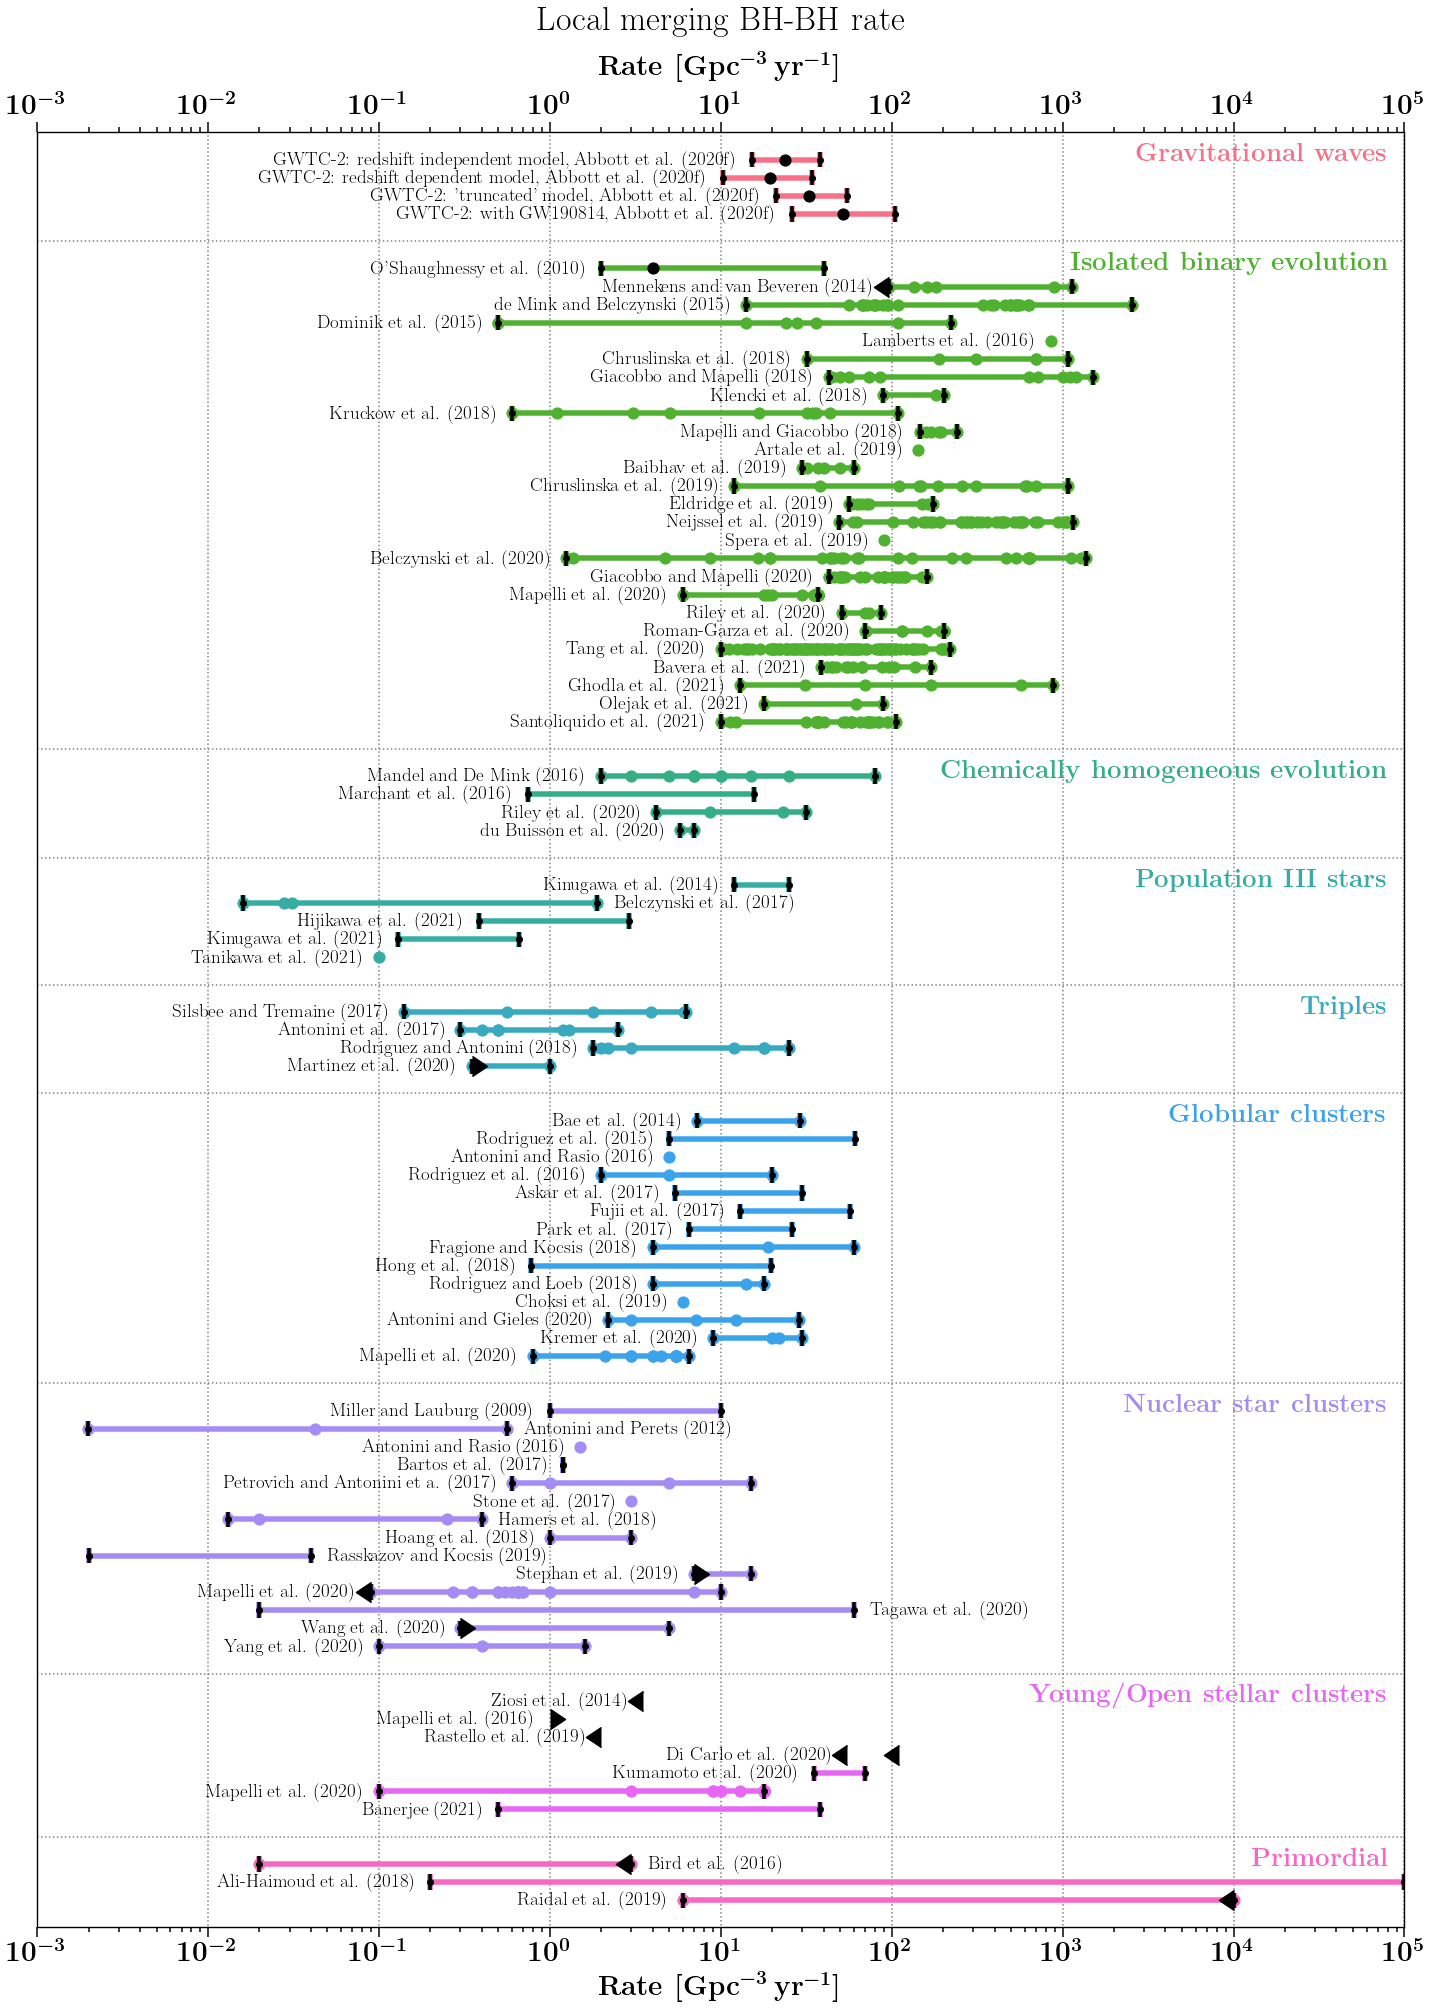

In [3]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



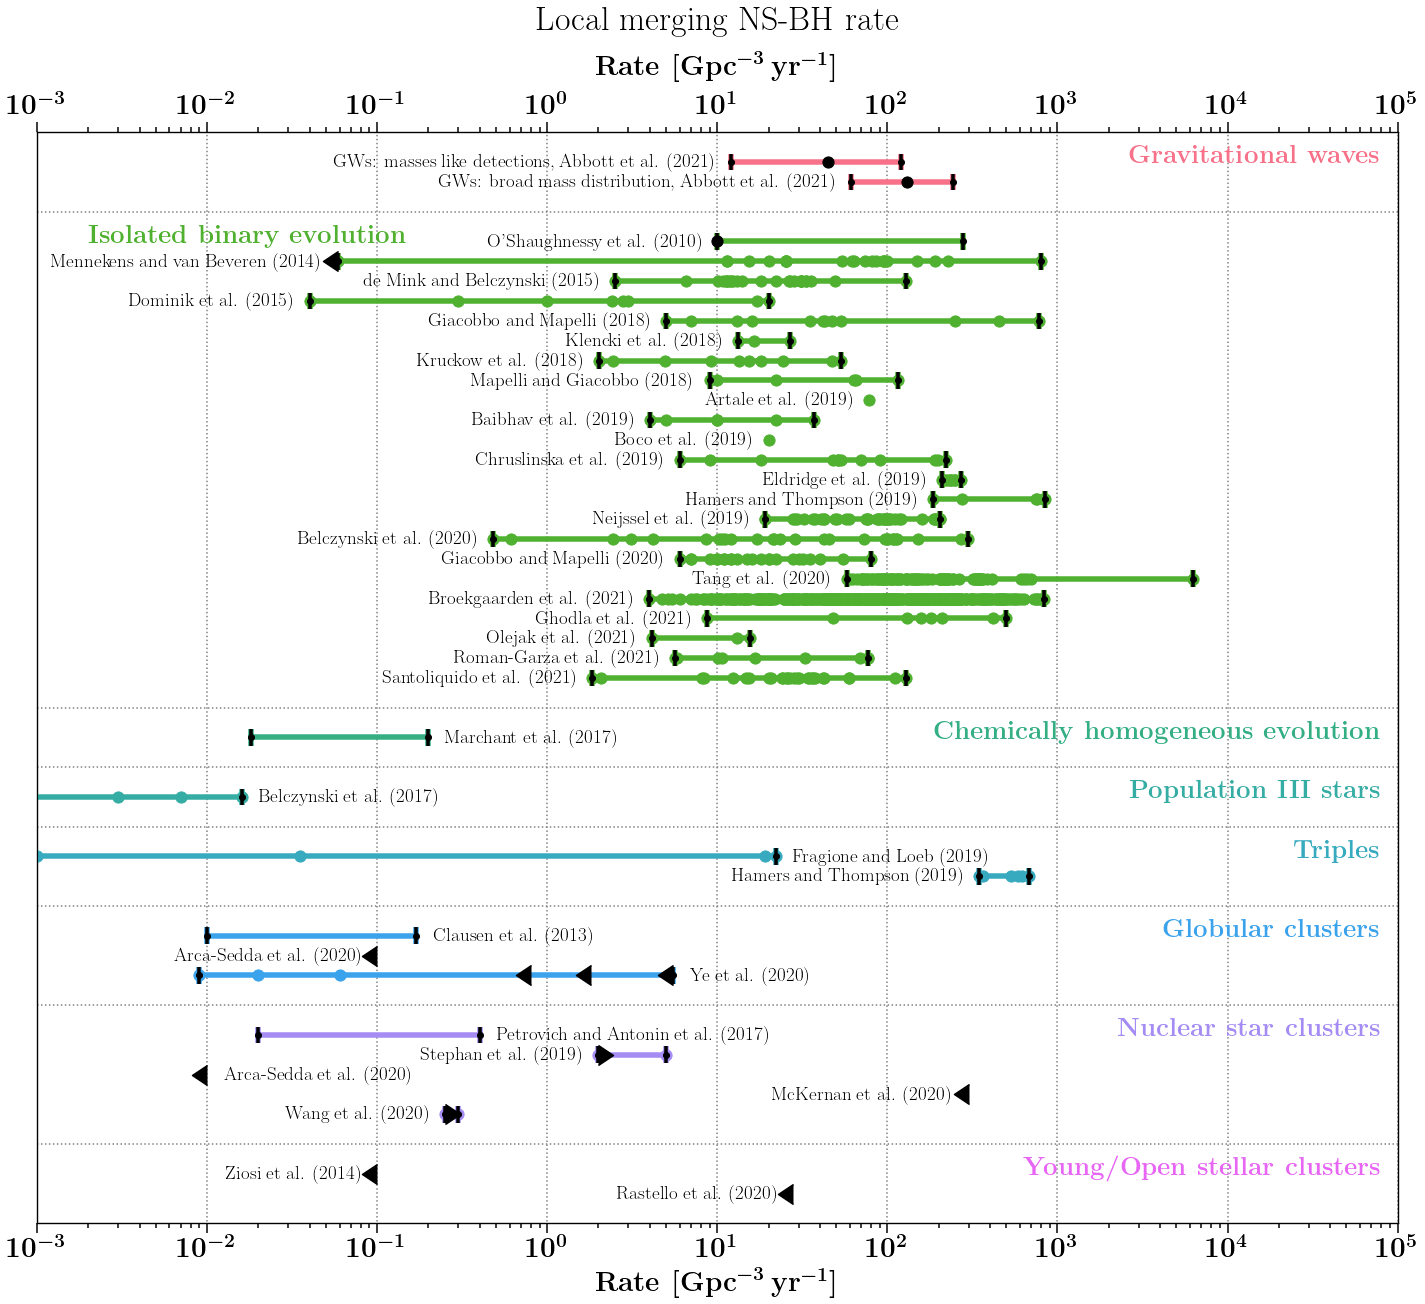

In [4]:
# make the NS-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



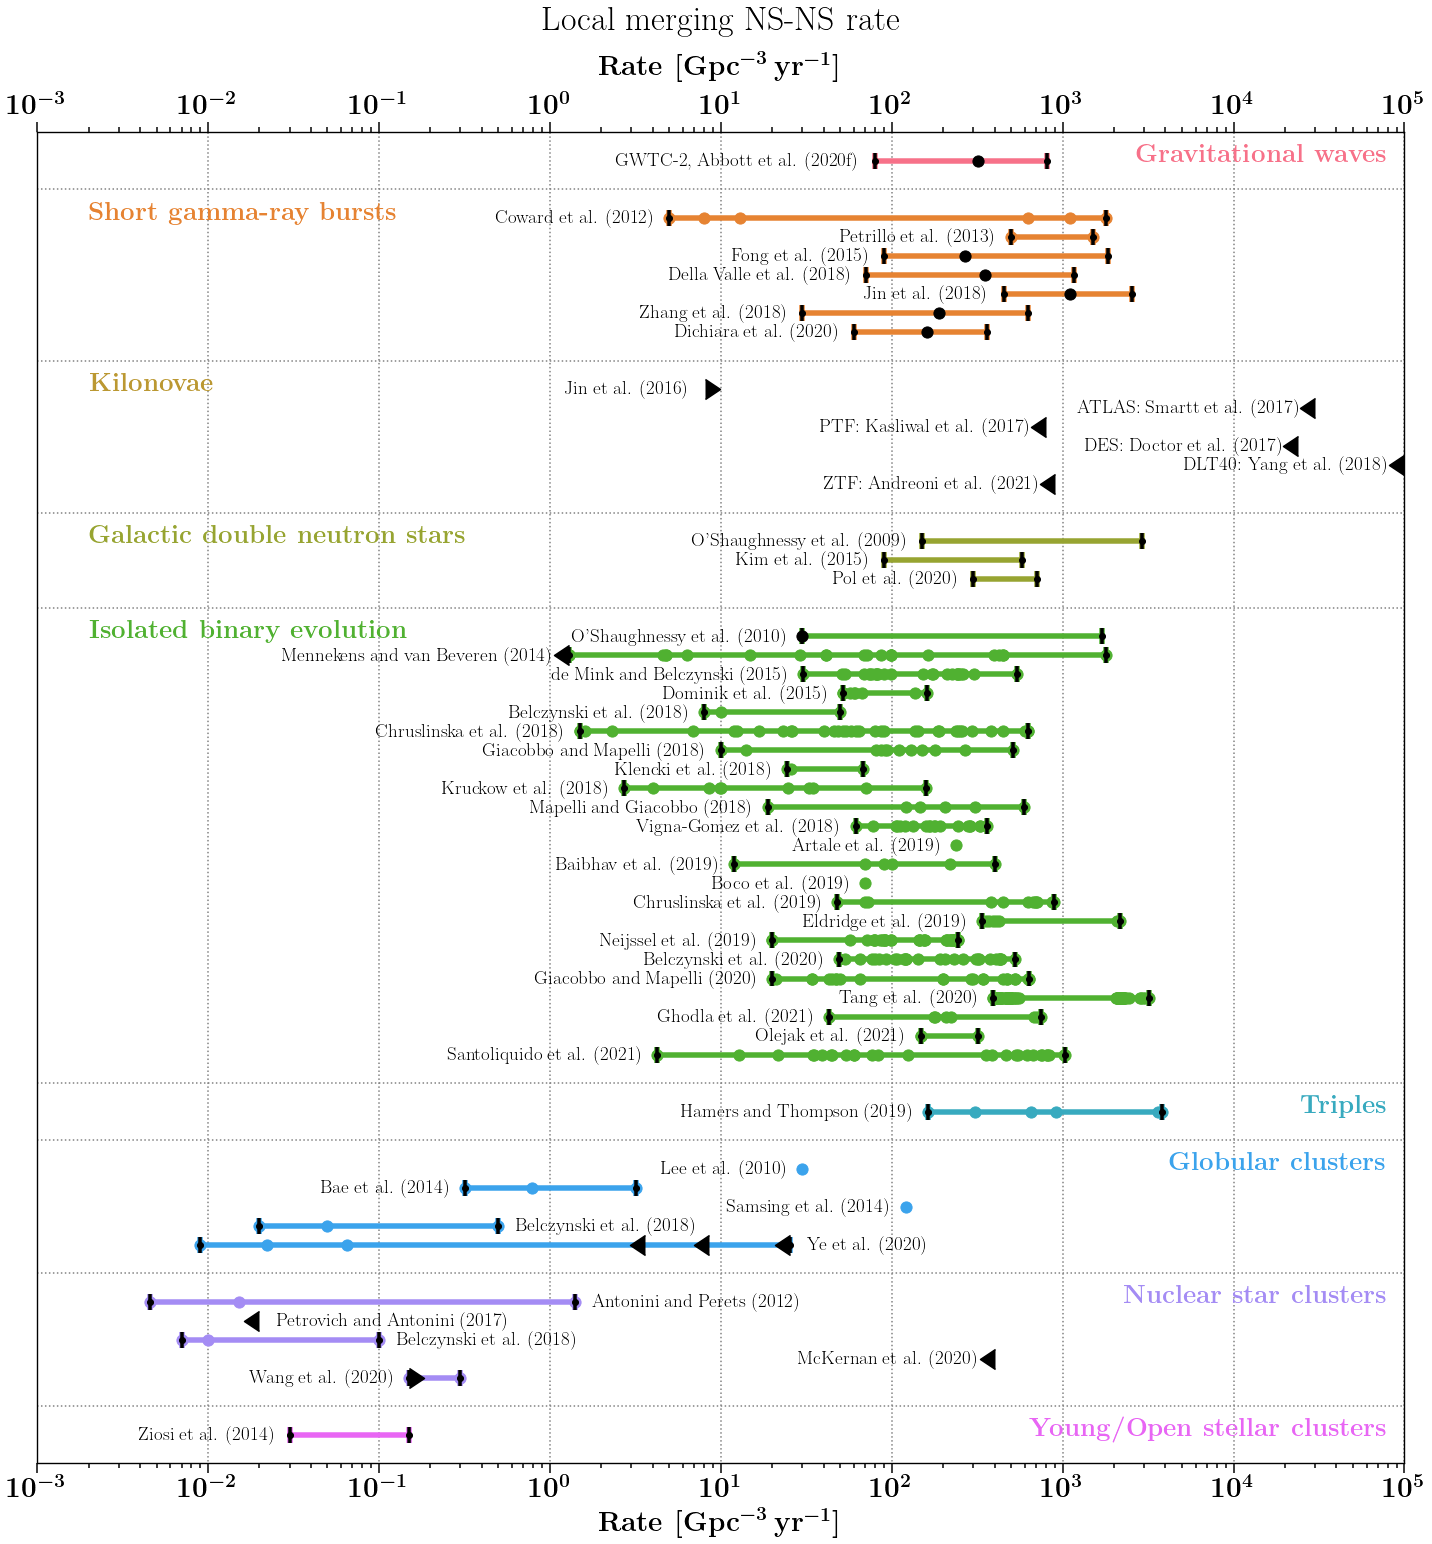

In [5]:
# make the NS-NS rates comparison figure 
make_figure(DCOtype='NSNS',ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)

